In [223]:
# !kaggle datasets download -d brllrb/uber-and-lyft-dataset-boston-ma

In [224]:
# !unzip uber-and-lyft-dataset-boston-ma.zip

Grade Challenge 4

- Name : Mohammad Aziz Riza
- Batch : MSIB
- Gambaran Dataset : Dataset yang digunakan yaitu dataset Uber and Lyft Dataset Boston, MA. Di mana dataset ini berkaitan dengan harga uber.
- Objective : Membuat model machine learning menggunakan Linear Regresi untuk memprediksi harga

#  Conceptual Problems

## 1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression!

1. **Asumsi Hubungan Linier (Linear Relationship):** Asumsi ini menyatakan bahwa hubungan antara variabel independen dan variabel dependen adalah linier. Artinya, perubahan dalam variabel independen akan memiliki efek yang konstan terhadap variabel dependen.

2. **Asumsi Tidak Ada atau Sedikit Multikolinearitas (No or Little Multicollinearity):** Multikolinearitas terjadi ketika dua atau lebih variabel independen dalam model memiliki hubungan yang kuat antara satu sama lain. Asumsi ini menyatakan bahwa variabel independen dalam model tidak saling berkorelasi secara signifikan.

3. **Asumsi Normalitas Multivariat (Multivariate Normality):** Asumsi ini mengasumsikan bahwa kesalahan dalam model regresi linear memiliki distribusi normal multivariat. Dengan kata lain, kesalahan dari setiap prediksi berdistribusi normal.

4. **Asumsi Tidak Ada Autokorelasi (No Auto-Correlation):** Autokorelasi terjadi ketika kesalahan dalam model memiliki korelasi dengan dirinya sendiri dari waktu ke waktu atau dari observasi ke observasi. Asumsi ini menyatakan bahwa tidak ada pola atau struktur yang tersisa dalam kesalahan setelah model diterapkan.

5. **Asumsi Homoskedastisitas (Homoscedasticity):** Homoskedastisitas berarti bahwa variansi dari kesalahan model adalah konstan di seluruh rentang nilai dari variabel independen. Artinya, tidak ada pola tertentu dalam sebaran kesalahan yang bergantung pada nilai variabel independen.

## 2. Tunjukkan dan tafsirkan arti dari slope dan intercept yang didapat dari model yang telah Anda bangun !

# **Import Libraries**

In [507]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression

# Evaluasi Model
from sklearn.metrics import mean_squared_error

# save model 
import pickle 
import joblib
import json

pd.set_option('display.max_columns', None) # Agar dapat melihat semua kolom tanpa terpotong 

# **Data Loading**

In [344]:
df = pd.read_csv("rideshare_kaggle.csv")
df.head(2)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,10.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [227]:
print("Jumlah baris : ",df.shape[0])
print("Jumlah kolom : ",df.shape[1])

Jumlah baris :  693071
Jumlah kolom :  57


Data memiliki 693071 baris dan 57 kolom

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Kolom target yaitu price memiliki missing value yang sangat tinggi yaitu 55095. Selain itu, terdapat fitur yang memiliki tipe data tidak tepat yaitu datetime bertipe data object seharusnya datetime

In [229]:
len(df.select_dtypes(include=['int', 'float']).columns) # Cek jumlah fitur bertipe data integer dan float

46

Terdapat 46 fitur yang memiliki tipe data float dan integer

In [230]:
len(df.select_dtypes(include='object').columns) # Cek jumlah fitur bertipe data object atau string

11

Terdapat 11 fitur yang memiliki tipe data object atau string

In [231]:
# Hitung jumlah nilai yang hilang di setiap kolom
missing_counts_per_column = df.isna().sum()

# Menjumlahkan nilai yang hilang di setiap kolom
total_missing_values = missing_counts_per_column.sum()

print(total_missing_values)

55095


Terdapat 55095 missing value

In [232]:
df.duplicated().sum()

0

Tidak terdapat data duplikat di semua baris

# **Exploratory Data Analysis (EDA)**

<ol>
<li>Bagaimana missing value pada price terjadi? 
<li>Pada bulan apa dataset ini diambil?
<li>Apakah product_id dan name sama saja?
<li>Bagaimana distribusi data di setiap fitur bertipe data integer dan float?
<li>Apakah terdapat outlier?
<li>Bagaimana korelasi setiap fitur terhadap fitur target(price) untuk fitur fitur numeric

## 1. Bagaimana missing value pada price terjadi? 

In [233]:
price_nan = df[df['price'].isna()]
price_nan.head(2)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
18,fa5fb705-03a0-4eb9-82d9-7fe80872f754,1.543674e+09,14,1,12,2018-12-01 14:13:04,America/New_York,North End,West End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.11,1.0,42.3647,-71.0542,36.99,32.27,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.68,5.87,6.26,1543672800,9.91,44.66,1543690800,35.04,1543712400,43.99,1543690800,35.69,1543712400,partly-cloudy-day,27.53,1022.32,344,0.44,1,9.91,280.1,1543665331,1543698851,0.82,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
31,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,1.543795e+09,23,2,12,2018-12-02 23:52:56,America/New_York,Beacon Hill,South Station,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.48,1.0,42.3588,-71.0707,48.83,48.83,Overcast,Light rain until evening.,0.0,0.0,0.96,2.83,2.98,1543755600,7.79,50.73,1543788000,44.99,1543816800,50.06,1543788000,45.64,1543816800,cloudy,47.81,1002.81,275,1.00,0,7.79,287.3,1543751797,1543785238,0.86,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000


In [234]:
df['timezone'].unique() # Cek unique value pada fitur "timezone" di data original

array(['America/New_York'], dtype=object)

Untuk timezone hanya America/New_York

In [235]:
df['cab_type'].unique() # Cek unique value pada fitur "cab_type" di data original

array(['Lyft', 'Uber'], dtype=object)

In [236]:
price_nan['cab_type'].unique() # Cek unique value pada fitur "cab_type" di data yang memiliki missing value pada fitur "price"

array(['Uber'], dtype=object)

Hanya yang bertipe Uber yang memiliki missing value pada fitur "price"

In [237]:
df['name'].unique() # Cek unique value pada fitur "name" di data original

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

In [238]:
price_nan['name'].unique() # Cek unique value pada fitur "name" di data yang memiliki missing value pada fitur "price"

array(['Taxi'], dtype=object)

Hanya yang bertipe Taxi yang memiliki missing value pada fitur "price"

Dapat disimpulkan bahwa yang tipe "cab_type" nya Uber dan "name" nya Taxi memiliki missing value di fitur "price". Selanjutnya akan dilakukan pengecekan, apakah jika data memiliki tipe "cab_type" nya Uber dan "name" nya Taxi pasti missing value di fitur "price" nya atau tidak

In [239]:
filter_data = df[(df['cab_type'] == "Uber") & (df['name'] == "Taxi")] # Filter data yang memiliki value di cab_type nya Uber dan value di name nya Taxi
filter_data[filter_data['price'].notna()] # Melihat data yang value di fitur price nya tidak missing

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime


In [240]:
len(filter_data) # Melihat jumlah data pada hasil filter

55095

In [241]:
df['price'].isna().sum() # Melihat jumlah missing value pada fitur "price"

55095

Dari data di atas, kita dapat menyimpulkan, jika nilai pada kolom "cab_type" adalah "Uber" dan nilai pada kolom "name" adalah "Taxi", semuanya **PASTI** memiliki nilai NaN atau missing value pada fitur "price". Sehingga setiap baris atau row yang memiliki missing value pada price perlu dilakukan drop.

## 2. Pada bulan apa dataset ini diambil?

In [242]:
df.month.value_counts()

month
12    406614
11    286457
Name: count, dtype: int64

Dataset ini diambil pada bulan 11(November) dan 12(Desember). Sehingga memiliki kemungkinan untuk fitur fitur yang berkaitan dengan cuaca tidak memiliki perbedaan yang signifikan atau memiliki distribusi yang terbilang normal.

## 3. Apakah product_id dan name sama saja?

In [338]:
df['product_id'].value_counts()

product_id
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: count, dtype: int64

In [339]:
df['name'].value_counts()

name
UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: count, dtype: int64

Dari hasil di atas didapatkan bahwa fitur product_id dan name itu sama saja atau dengan kata lain name merupakan product dengan id tiap kategori yaitu product id, sehingga fitur product_id dapat diabaikan atau di drop

## 4. Bagaimana distribusi data di setiap fitur bertipe data integer dan float?

### Numeric

In [243]:
fitur_number = df.select_dtypes(include=['int', 'float']).columns # Mengambil fitur fitur yang bertipe data integer dan float

highly_skewed = []
moderately_skewed = []
normal_skewed = []

# Perulangan untuk mengecek skewnes masing masing fitur 
for i in df[fitur_number].columns : 
    nilai_skew = df[i].skew() # Hitung skewness
    if nilai_skew < -1 or nilai_skew > 1 : # Jika skewnessnya lebih besar dari 1 atau lebih kecil -1
        highly_skewed.append(i)
    elif (nilai_skew >= -1 and nilai_skew <= -0.5) or (nilai_skew <= 1 and nilai_skew >= 0.5) :  # Jika skewnessnya di antara -1 dan -0.5 atau di antara 1 dan 0.5
        moderately_skewed.append(i)
    else : # Jika skewnessnya tidak memenuhi dua kondisi di atas
        normal_skewed.append(i)

In [244]:
for i in highly_skewed :
    print(i, end=", ")

price, surge_multiplier, latitude, precipIntensity, precipProbability, windGust, visibility, uvIndex, visibility.1, apparentTemperatureMin, 

Terdapat 10 fitur yang memiliki nilai nilai ekstrim, salah satunya fitur price

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9940\3770462599.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], ax=axes)


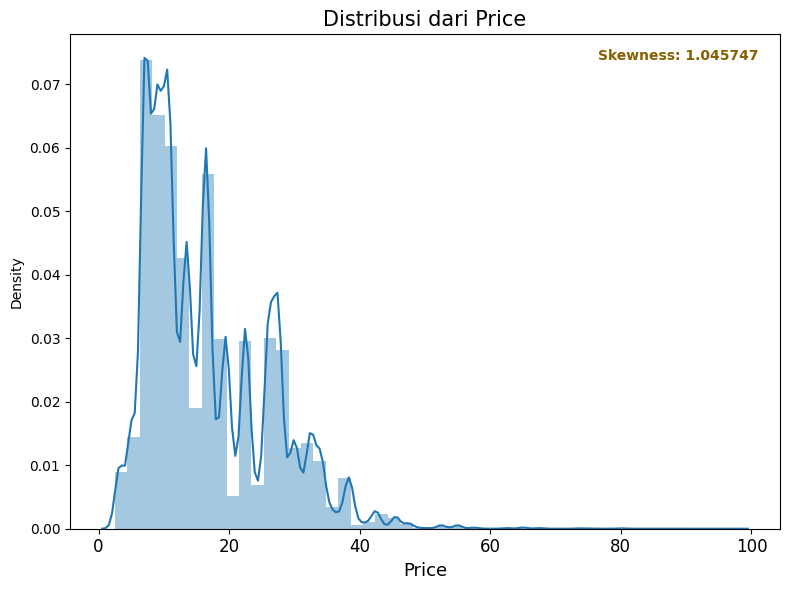

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(8, 6))

# Plot distribusi dari kolom "price"
sns.distplot(df['price'], ax=axes)
    
axes.set_title('Distribusi dari Price', fontsize=15, loc='center')
axes.set_xlabel('Price', fontsize=13)
plt.tick_params(axis='x', which='major', labelsize=12)
axes.yaxis.tick_left()  # where the y axis marks will be
    
# Tambahkan teks untuk skewness dan kurtosis
axes.text(x=0.97, y=0.97, transform=axes.transAxes,
            s="Skewness: %f" % df['price'].skew(), fontweight='demibold', fontsize=10,
            verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:poo brown')

plt.tight_layout()
plt.show()


Contoh visualisasi dari price terlihat memiliki skewness 1.05 sehingga cenderung memiliki ekor yang lebih panjang di sisi kanan

In [246]:
for i in moderately_skewed :
    print(i, end=", ")

distance, temperature, apparentTemperatureLow, windBearing, cloudCover, precipIntensityMax, temperatureMin, apparentTemperatureMax, 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9940\3158327451.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['distance'], ax=axes)


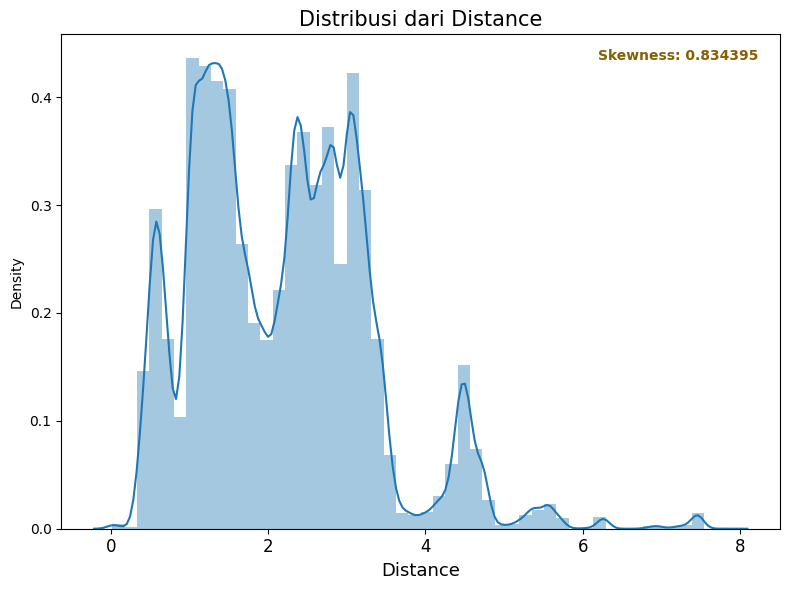

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(8, 6))

# Plot distribusi dari kolom "distance"
sns.distplot(df['distance'], ax=axes)
    
axes.set_title('Distribusi dari Distance', fontsize=15, loc='center')
axes.set_xlabel('Distance', fontsize=13)
plt.tick_params(axis='x', which='major', labelsize=12)
axes.yaxis.tick_left()  # where the y axis marks will be
    
# Tambahkan teks untuk skewness dan kurtosis
axes.text(x=0.97, y=0.97, transform=axes.transAxes,
            s="Skewness: %f" % df['distance'].skew(), fontweight='demibold', fontsize=10,
            verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:poo brown')

plt.tight_layout()
plt.show()


Untuk fitur distance pun memiliki skewness 0.83 sehingga cenderung memiliki ekor yang lebih panjang di sisi kanan

Terdapat 8 fitur yang memiliki moderately_skewed 

In [248]:
for i in normal_skewed :
    print(i, end=", ")

timestamp, hour, day, month, longitude, apparentTemperature, humidity, windSpeed, windGustTime, temperatureHigh, temperatureHighTime, temperatureLow, temperatureLowTime, apparentTemperatureHigh, apparentTemperatureHighTime, apparentTemperatureLowTime, dewPoint, pressure, ozone, sunriseTime, sunsetTime, moonPhase, uvIndexTime, temperatureMinTime, temperatureMax, temperatureMaxTime, apparentTemperatureMinTime, apparentTemperatureMaxTime, 

In [249]:
len(normal_skewed)

28

Terdapat 28 fitur yang memiliki distribusi normal, di mana fitur fitur nya itu berkaitan dengan cuaca dan satuan waktu kondisi lingkungan. Ini dikatakan wajar karna hanya mengambil 2 bulan terakhir yaitu bulan 11 dan 12

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9940\1220481709.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pressure'], ax=axes)


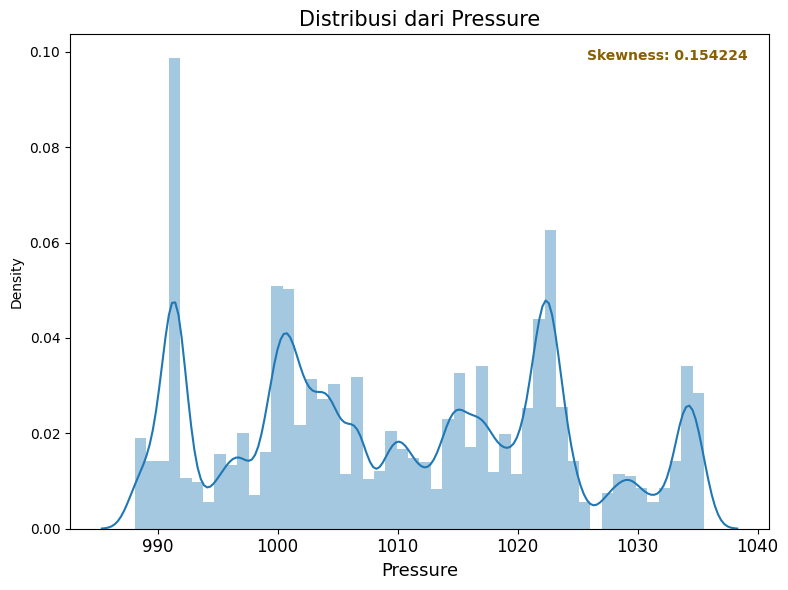

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(figsize=(8, 6))

# Plot distribusi dari kolom "pressure"
sns.distplot(df['pressure'], ax=axes)
    
axes.set_title('Distribusi dari Pressure', fontsize=15, loc='center')
axes.set_xlabel('Pressure', fontsize=13)
plt.tick_params(axis='x', which='major', labelsize=12)
axes.yaxis.tick_left()  # where the y axis marks will be
    
# Tambahkan teks untuk skewness dan kurtosis
axes.text(x=0.97, y=0.97, transform=axes.transAxes,
            s="Skewness: %f" % df['pressure'].skew(), fontweight='demibold', fontsize=10,
            verticalalignment='top', horizontalalignment='right', backgroundcolor='white', color='xkcd:poo brown')

plt.tight_layout()
plt.show()


In [251]:
display(df['pressure'].mean())
display(df['pressure'].median())
display(df['pressure'].mode())

1010.0947664524991

1009.25

0    996.21
Name: pressure, dtype: float64

Untuk fitur Pressure memiliki skewness 0.15 sehingga kurang lebih simetris dengan nilai median, mean dan modus hampir sama

### Object / String

In [252]:
fitur_object = list(df.select_dtypes(include='object').columns)
fitur_object

['id',
 'datetime',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon']

Melihat distribusi dengan value_count masing masing fitur selain id dan datetime karna tidak termasuk kategori. Fitur timezone pun tidak dilihat distribusinya karena hanya satu nilai unik nya yaitu Amerika

In [253]:
filter_fitur_object = fitur_object[3:] # Hanya mengambil index setelah 2

for col in filter_fitur_object:
    print(f"Jumlah kategori unik dalam kolom {col} :")
    display(df[col].value_counts())
    print("-"*10)

Jumlah kategori unik dalam kolom source :


source
Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: count, dtype: int64

----------
Jumlah kategori unik dalam kolom destination :


destination
Financial District         58851
Theatre District           57798
Back Bay                   57780
Haymarket Square           57764
Boston University          57764
Fenway                     57757
North End                  57756
Northeastern University    57755
South Station              57749
West End                   57575
Beacon Hill                57403
North Station              57119
Name: count, dtype: int64

----------
Jumlah kategori unik dalam kolom cab_type :


cab_type
Uber    385663
Lyft    307408
Name: count, dtype: int64

----------
Jumlah kategori unik dalam kolom product_id :


product_id
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: count, dtype: int64

----------
Jumlah kategori unik dalam kolom name :


name
UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: count, dtype: int64

----------
Jumlah kategori unik dalam kolom short_summary :


short_summary
 Overcast             218895
 Mostly Cloudy        146210
 Partly Cloudy        127224
 Clear                 87126
 Light Rain            54912
 Rain                  23712
 Possible Drizzle      18636
 Foggy                  9060
 Drizzle                7296
Name: count, dtype: int64

----------
Jumlah kategori unik dalam kolom long_summary :


long_summary
 Mostly cloudy throughout the day.                      202340
 Partly cloudy throughout the day.                      145279
 Light rain in the morning.                             102485
 Rain throughout the day.                                54288
 Light rain in the morning and overnight.                50544
 Rain until morning, starting again in the evening.      47931
 Foggy in the morning.                                   44772
 Light rain until evening.                               35568
 Overcast throughout the day.                             7488
 Possible drizzle in the morning.                         1872
 Rain in the morning and afternoon.                        504
Name: count, dtype: int64

----------
Jumlah kategori unik dalam kolom icon :


icon
 cloudy                  218895
 partly-cloudy-night     158030
 partly-cloudy-day       115404
 rain                    104556
 clear-night              60294
 clear-day                26832
 fog                       9060
Name: count, dtype: int64

----------


- Antar nilai di fitur source, destination, cab_type, product_id, name tidak berbeda jauh 
- Antar nilai di fitur short_summary, long_summary, icon memiliki perbedaan nilai yang cukup tinggi

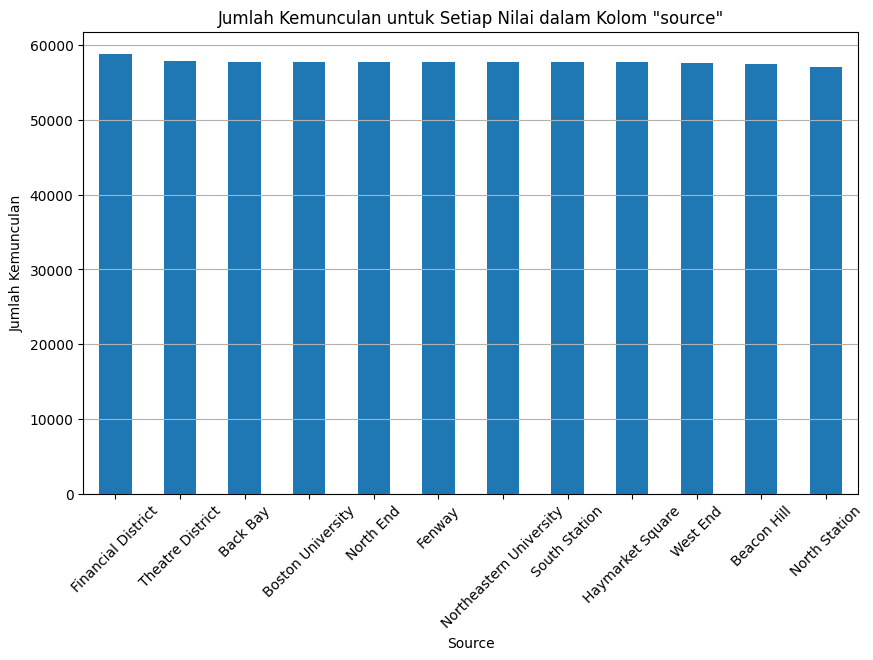

In [254]:
# Hitung jumlah kemunculan setiap nilai dalam kolom "source"
source_counts = df['source'].value_counts()

# Buat bar plot
plt.figure(figsize=(10, 6))
source_counts.plot(kind='bar')
plt.title('Jumlah Kemunculan untuk Setiap Nilai dalam Kolom "source"')
plt.xlabel('Source')
plt.ylabel('Jumlah Kemunculan')
plt.xticks(rotation=45)  # Putar label sumbu x agar mudah dibaca
plt.grid(axis='y')  # Tambahkan grid pada sumbu y
plt.show()


Pada contoh visualisasi pada fitur source dengan barplot menunjukkan nilai yang hampir sama pada setiap kategori 

## 5. Apakah Terdapat outlier?

### Perhitungan

In [255]:
jumlah = 0

# menggabungkan fitur yang highly_skewed dan moderately_skewed
combined_data = highly_skewed + moderately_skewed

for col in combined_data:
    data = list(df[col])

    # Hitung kuartil ke-25 dan ke-75
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    # Hitung Rentang Interkuartil (IQR)
    IQR = Q3 - Q1
    
    # Hitung batas atas dan batas bawah untuk outlier
    upper_boundary = Q3 + (IQR * 1.5)
    lower_boundary = Q1 - (IQR * 1.5)

    # Identifikasi outlier dalam data
    outliers = [x for x in data if x > upper_boundary or x < lower_boundary]
    jumlah += len(outliers)
    
print(jumlah)
    

1119372


Terdapat banyak sekali outlier pada fitur fitur yang tidak memiliki distribusi normal yaitu sebanyak 1119372

### Visual dengan boxplot

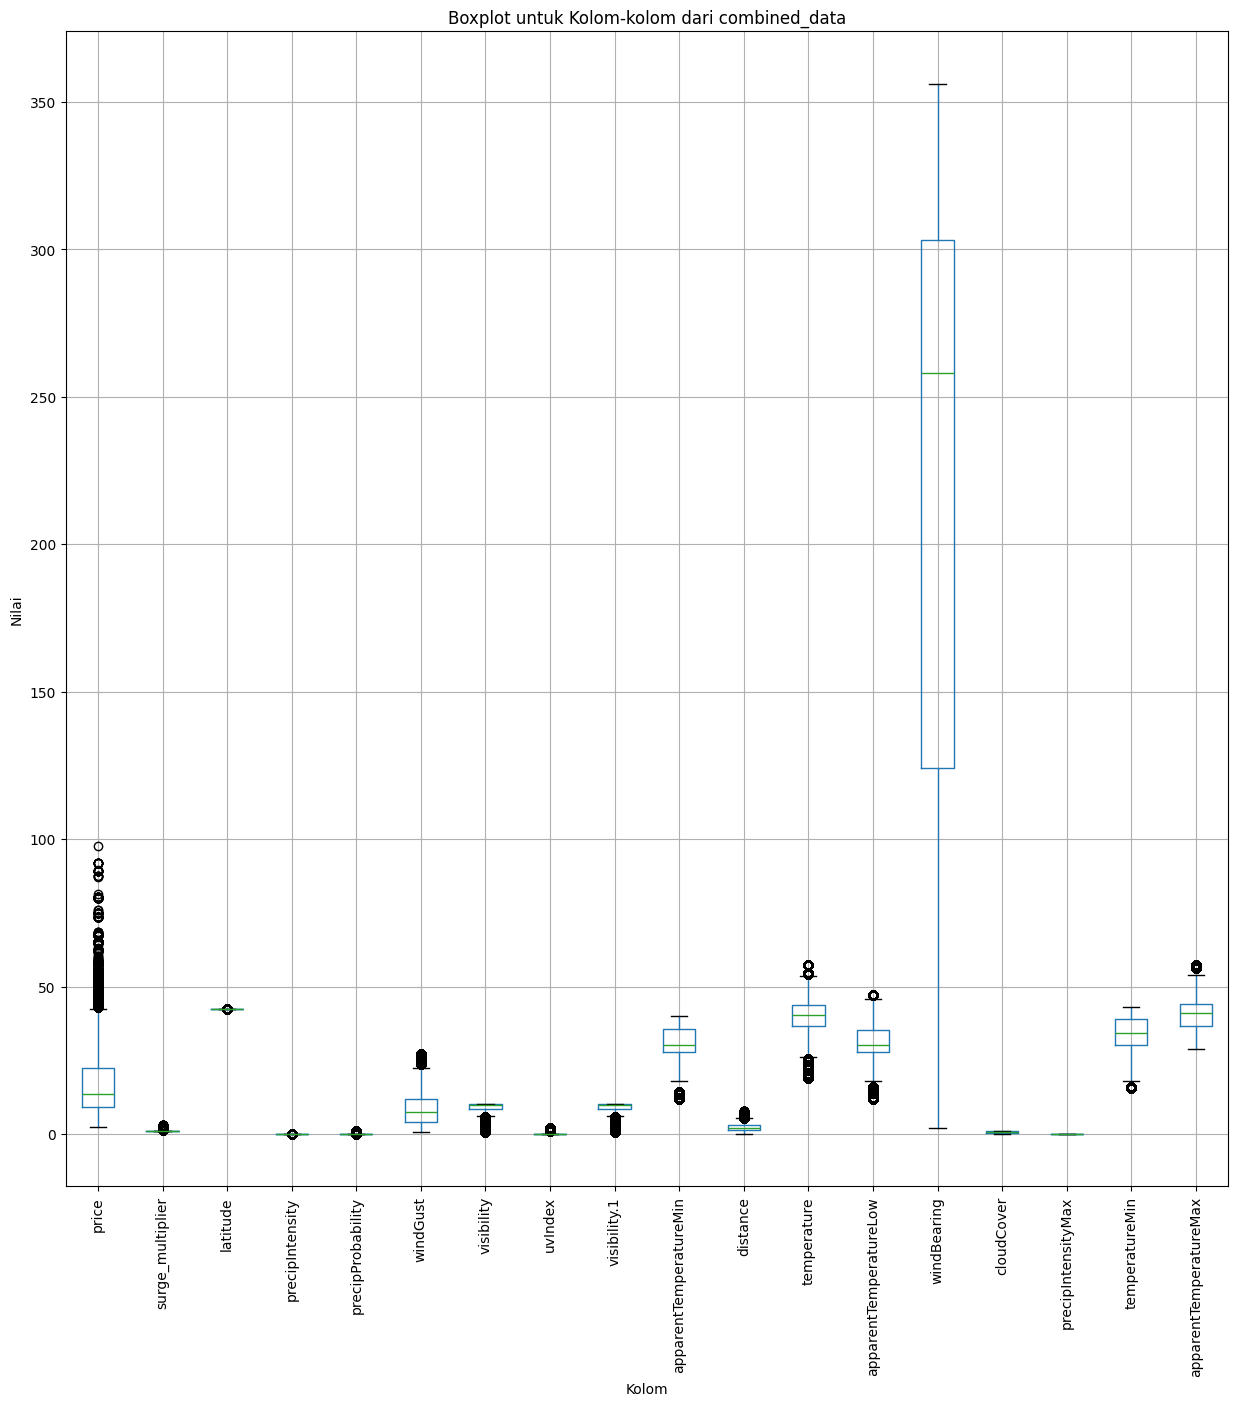

In [256]:
# Membuat boxplot
plt.figure(figsize=(15, 15))
df.boxplot(column=list(combined_data))
plt.title('Boxplot untuk Kolom-kolom dari combined_data')
plt.xlabel('Kolom')
plt.ylabel('Nilai')
plt.xticks(rotation=90)
plt.show()

Dengan menggunakan boxplot pun terlihat banyak sekali data yang outlier sehingga perlu dilakukan handling

## 6. Bagaimana korelasi setiap fitur terhadap fitur target(price) untuk fitur fitur numeric

### Fitur Skew(Tidak berdistribusi normal)

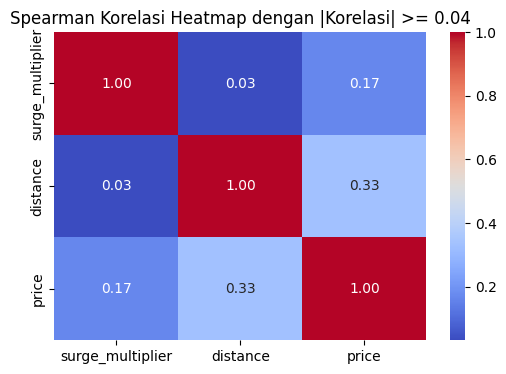

In [474]:
fitur_tidak_normal = []
combined_skew_fitur = highly_skewed+moderately_skewed # fitur yang tidak normal

# Ambil hanya yang bertipe numeric
for col in combined_skew_fitur:
    if (df[col].dtypes == "float64") | (df[col].dtypes == "int64"): 
        fitur_tidak_normal.append(col)

# Menghitung korelasi menggunakan metode Spearman karena memiliki distribusi yang tidak normal
corr_spearman = df[fitur_tidak_normal].corr(method='spearman')

# Filter korelasi yang memiliki nilai >= 0.04 atau <= -0.04 dengan fitur "price"
significant_corr_price = corr_spearman[((corr_spearman['price'] >= 0.04) | (corr_spearman['price'] <= -0.04)) & (corr_spearman.index != 'price')]

# Memilih kolom "price" dan kolom-kolom yang memiliki korelasi signifikan dengan "price"
significant_columns = significant_corr_price.index.tolist() + ['price']
df_significant_corr = df[significant_columns]

# Membuat heatmap dengan korelasi yang difilter
plt.figure(figsize=(6, 4))
sns.heatmap(df_significant_corr.corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Korelasi Heatmap dengan |Korelasi| >= 0.04")
plt.show()

Terdapat 2 fitur yang memiliki nilai korelasi >= 0.04 atau <= -0.04 dengan fitur "price". Sehingga dapat dilakukan drop pada bagian Feature Selection untuk fitur yang tidak berkorelasi

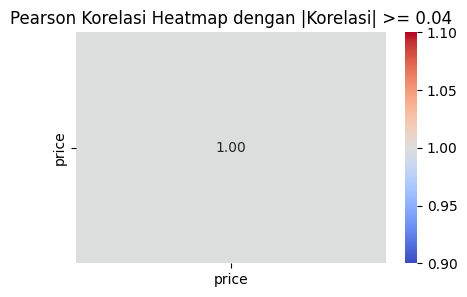

In [475]:
fitur_normal = []

# Ambil hanya yang bertipe numeric
for col in normal_skewed:
    if (df[col].dtypes == "float64") | (df[col].dtypes == "int64"): 
        fitur_normal.append(col)

fitur_normal.append("price")
# Menghitung korelasi menggunakan metode Pearson karena memiliki distribusi yang tidak normal
corr_pearson = df[fitur_normal].corr(method='pearson')

# Filter korelasi yang memiliki nilai >= 0.04 atau <= -0.04 dengan fitur "price"
significant_corr_price = corr_pearson[((corr_pearson['price'] >= 0.04) | (corr_pearson['price'] <= -0.04)) & (corr_pearson.index != 'price')]

# Memilih kolom "price" dan kolom-kolom yang memiliki korelasi signifikan dengan "price"
significant_columns = significant_corr_price.index.tolist() + ['price']
df_significant_corr = df[significant_columns]

# Membuat heatmap dengan korelasi yang difilter
plt.figure(figsize=(5, 3))
sns.heatmap(df_significant_corr.corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Korelasi Heatmap dengan |Korelasi| >= 0.04")
plt.show()

Dengan diberi batasan nilai absolut 0.4 tidak ada 1 fitur pun yang berkorelasi dengan price. Sehingga dapat dilakukan drop pada bagian Feature Selection untuk fitur yang tidak berkorelasi

# **Feature Engineering**

## Split Train Test

In [331]:
X = df.drop('price',axis=1)
y = df['price']

In [332]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=200)

In [333]:
print("Jumlah data train :",X_train.shape[0])
print("Jumlah data test :",X_test.shape[0])

Jumlah data train : 554456
Jumlah data test : 138615


## Feature Transformation

### Missing Value Handling

Seperti yang sudah diketahui di EDA bahwa fitur yang memiliki missing value yaitu price dan akan dilakukan drop

In [288]:
y_train_missing_drop = y_train.dropna()
y_test_missing_drop = y_test.dropna()

In [289]:
print("Jumlah data train :",y_train_missing_drop.shape[0])
print("Jumlah data test :",y_test_missing_drop.shape[0])

Jumlah data train : 510291
Jumlah data test : 127685


Karena dropna pada fitur target sehingga ada perbedaan dengan fitur predictor, sehingga perlu disesuaikan indexnya

In [290]:
X_train_missing_drop = X_train.loc[y_train_missing_drop.index]
X_test_missing_drop = X_test.loc[y_test_missing_drop.index]

In [291]:
print("Jumlah data train :",X_train_missing_drop.shape[0])
print("Jumlah data test :",X_test_missing_drop.shape[0])

Jumlah data train : 510291
Jumlah data test : 127685


In [292]:
print("Jumlah data train :",y_train_missing_drop.shape[0])
print("Jumlah data test :",y_test_missing_drop.shape[0])

Jumlah data train : 510291
Jumlah data test : 127685


Jumlah data setelah Handling Missing Value menjadi 510291 pada train dan 127685 pada test

### Outlier Handling

Karna akan menggunakan Linear Regression di mana model ini sensitive terhadap outliers maka untuk outlier akan dilakukan drop

In [312]:
# menggabungkan fitur yang highly_skewed dan moderately_skewed
outliers_column = highly_skewed + moderately_skewed
outliers_column.remove("price")

outliers_index_train_list = []
outliers_index_test_list = []

for col in outliers_column:
    data_train = X_train_missing_drop[col]
    data_test = X_test_missing_drop[col]
    
    # Hitung kuartil ke-25 dan ke-75
    Q1 = np.percentile(data_train, 25) # Mencari Q1 pada data train
    Q3 = np.percentile(data_train, 75) # Mencari Q3 pada data train

    # Hitung Rentang Interkuartil (IQR)
    IQR = Q3 - Q1
    
    # Hitung batas atas dan batas bawah untuk outlier
    upper_boundary = Q3 + (IQR * 1.5)
    lower_boundary = Q1 - (IQR * 1.5)

    # Identifikasi outlier dalam data train dan test
    outliers_index_train = data_train[(data_train > upper_boundary) | (data_train < lower_boundary)].index
    outliers_index_test = data_test[(data_test > upper_boundary) | (data_test < lower_boundary)].index
    
    # Menambahkan setiap indeks ke dalam list menggunakan append
    for idx in outliers_index_train:
        outliers_index_train_list.append(idx)
    
    # Menambahkan setiap indeks ke dalam list menggunakan append
    for idx in outliers_index_test:
        outliers_index_test_list.append(idx)

In [325]:
index_train = pd.DataFrame({"outlier" : outliers_index_train_list})
index_test = pd.DataFrame({"outlier" : outliers_index_test_list})

In [326]:
# Lakukan drop duplicated dari index outlier train, dikarenakan perhitungan sebelumnya memiliki kemungkinan duplikat
index_train.drop_duplicates(inplace=True) 
len(index_train)

332255

In [327]:
# Lakukan drop duplicated dari index outlier test, dikarenakan perhitungan sebelumnya memiliki kemungkinan duplikat
index_test.drop_duplicates(inplace=True)
len(index_test)

83066

In [328]:
# Drop baris yang mengandung outlier pada data train dan test
X_train_HO = X_train_missing_drop.drop(index=list(index_train['outlier']))
X_test_HO = X_test_missing_drop.drop(index=list(index_test['outlier']))

In [461]:
# Menyamakan indeks pada data y dengan data X yang sudah di drop outlier
y_train_HO = y_train_missing_drop.loc[X_train_HO.index]
y_test_HO = y_test_missing_drop.loc[X_test_HO.index]

In [330]:
print(len(X_train_HO))
print(len(X_test_HO))

178036
44619


Setelah Outlier Handling dengan Trimming data menjadi 178036 pada data train dan 44619 pada data test

## Scalling

Scalling dilakukan pada fitur "distance" dan "surge_multiplier" yang memiliki korelasi cukup baik dengan fitur target(price). Akan digunakan metode StandardScaler karna outlier sudah di Trim

In [445]:
## With Median Imputation and Without 0/1 Imputation
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train_HO[["distance","surge_multiplier"]])
X_test_scale = scaler.transform(X_test_HO[["distance","surge_multiplier"]])

In [446]:
# Mengonversi hasil penskalaan menjadi DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scale, columns=["distance_scaled", "surge_multiplier_scaled"], index=X_train_HO.index)
X_test_scaled_df = pd.DataFrame(X_test_scale, columns=["distance_scaled", "surge_multiplier_scaled"], index=X_test_HO.index)

In [429]:
X_train_scaled_df.head(1)

,distance_scaled,surge_multiplier_scaled
339466,-0.502691,0.0


## Encoding

In [434]:
for col in filter_fitur_object :
    print(f'Number of categories in the variable {col}     : ',format(len(X_train_HO[col].unique())))

Number of categories in the variable source     :  12
Number of categories in the variable destination     :  12
Number of categories in the variable cab_type     :  2
Number of categories in the variable product_id     :  12
Number of categories in the variable name     :  12
Number of categories in the variable short_summary     :  4
Number of categories in the variable long_summary     :  8
Number of categories in the variable icon     :  5


Beberapa dari fitur bersifat nominal namun adapun yang ordinal seperti cab_type dan name. Jika menggunakan One Hot Endoding untuk nominal akan menyebabkan data memiliki dimensi yang tinggi, sehingga akan menggunakan 

In [447]:
# Inisialisasi objek OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

X_train_enc = ordinal_encoder.fit_transform(X_train_HO[filter_fitur_object])
X_test_enc = ordinal_encoder.transform(X_test_HO[filter_fitur_object])

In [487]:
column_cat = ['source_enc','destination_enc','cab_type_enc','product_id_enc','name_enc','short_summary_enc','long_summary_enc','icon_enc']

# Mengonversi hasil penskalaan menjadi DataFrame
X_train_enc_df = pd.DataFrame(X_train_enc, columns=column_cat, index=X_train_HO.index)
X_test_enc_df = pd.DataFrame(X_test_enc, columns=column_cat, index=X_test_HO.index)

In [449]:
# Menggabungkan kedua DataFrames secara berdampingan
X_train_final = pd.concat([X_train_scaled_df, X_train_enc_df], axis=1)
X_test_final = pd.concat([X_test_scaled_df, X_test_enc_df], axis=1)

## Feature Selection

Untuk data numeric sudah dilakukan cek korelasi pada tahap EDA, di mana hasilnya yang berkorelasi >= 0.1 yaitu distance dan surge_multiplier. Selanjutnya akan cek korelasi untuk data kategori menggunakan Kendal terhadap price

In [468]:
from scipy.stats import kendalltau

for col in column_cat:
    # Menghitung korelasi Kendall antara kolom prediktor dengan 'price'
    corr_tau, pval = kendalltau(X_train_final[col], y_train_HO)

    print(f"Fitur {col}")
    print(f"Kendall's tau: {corr_tau:.2f}, p-value: {pval}")
    print("-"*10)

Fitur source_enc
Kendall's tau: -0.01, p-value: 0.0007647198283805577
----------
Fitur destination_enc
Kendall's tau: -0.03, p-value: 2.4289757816138425e-79
----------
Fitur cab_type_enc
Kendall's tau: -0.04, p-value: 3.0446774324727372e-80
----------
Fitur product_id_enc
Kendall's tau: 0.03, p-value: 2.4342629583607024e-93
----------
Fitur name_enc
Kendall's tau: -0.39, p-value: 0.0
----------
Fitur short_summary_enc
Kendall's tau: 0.00, p-value: 0.12502224108347618
----------
Fitur long_summary_enc
Kendall's tau: 0.00, p-value: 0.9108201883753494
----------
Fitur icon_enc
Kendall's tau: 0.00, p-value: 0.028708193782376955
----------


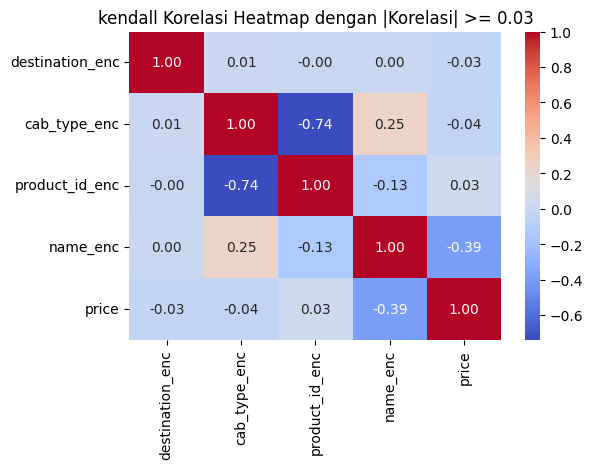

In [500]:
tes = pd.concat([X_train_final, y_train_HO], axis=1)
column = column_cat
column.append('price')

# Menghitung korelasi menggunakan metode kendall karena memiliki distribusi yang tidak normal
corr_kendall = tes[column].corr(method='kendall')

# Filter korelasi yang memiliki nilai >= 0.03 atau <= -0.03 dengan fitur "price"
significant_corr_price = corr_kendall[((corr_kendall['price'] > 0.03) | (corr_kendall['price'] < -0.03)) & (corr_kendall.index != 'price')]

# Memilih kolom "price" dan kolom-kolom yang memiliki korelasi signifikan dengan "price"
significant_columns = significant_corr_price.index.tolist() + ['price']
tes_significant_corr = tes[significant_columns]

# Membuat heatmap dengan korelasi yang difilter
plt.figure(figsize=(6, 4))
sns.heatmap(tes_significant_corr.corr(method='kendall'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("kendall Korelasi Heatmap dengan |Korelasi| >= 0.03")
plt.show()

Terdapat 4 fitur yang berkorelasi dengan price, di mana akan dilakukan drop untuk yang tidak memiliki korelasi termasuk product_id_enc

Fitur yang terpilih yaitu distance, surge_multiplier, destination_enc, cab_type_enc, dan name_enc

In [505]:
X_train_terpilih = X_train_final[['distance_scaled','surge_multiplier_scaled','destination_enc','cab_type_enc','name_enc']]
X_test_terpilih = X_test_final[['distance_scaled','surge_multiplier_scaled','destination_enc','cab_type_enc','name_enc']]

# **Model Definition**

Definisi Linear Regression : Linear Regression adalah algoritma untuk masalah regresi yang dapat menjelaskan hubungan antara satu variabel dependen (target) dan satu atau lebih variabel independen (fitur) dengan memfittingkan persamaan linear ke data yang diamati. Target harus dalam bentuk kontinu di mana pada kasus ini yaitu price, dan masalah yang dibahas adalah seperti memprediksi harga perjalanan uber. Saya menggunakan metrik evaluasi Mean Squared Error (MSE) untuk mengukur seberapa baik model memprediksi nilai target dikarenakan tidak ada outlier dan memiliki fokus terkait error yang kecil karena memprediksi harga.

# **Model Training**

In [510]:
linreg = LinearRegression()

linreg.fit(X_train_terpilih, y_train_HO)

LinearRegression()

In [511]:
y_pred_train = linreg.predict(X_train_terpilih)
y_pred_test = linreg.predict(X_test_terpilih)

print('MSE - Train Set : ', mean_squared_error(y_train_HO, y_pred_train))
print('MSE - Test Set  : ', mean_squared_error(y_test_HO, y_pred_test))

MSE - Train Set :  38.82849700748308
MSE - Test Set  :  38.85471254475726


Nilai MSE sangat tinggi sehingga dapat dikatakan model yang dihasilkan kurang baik atau akurat

In [516]:
# Mendapatkan nilai slope (koefisien) dari linreg
slope = linreg.coef_

# Mendapatkan nilai intercept dari linreg
intercept = linreg.intercept_

print("Slope (Koefisien):", slope)
print("Intercept:", intercept)

Slope (Koefisien): [ 2.95321106e+00 -5.99173489e-15  1.65324963e-02  2.36173804e+00
 -1.60428989e+00]
Intercept: 23.657213456694386


1. Untuk fitur pertama, kemiringannya adalah sekitar 2.95321106.
2. Untuk fitur kedua, koefisiennya mendekati nol (-5.99173489e-15).
3. Untuk fitur ketiga, kemiringannya adalah sekitar 0.0165324963.
4. Untuk fitur keempat, kemiringannya adalah sekitar 2.36173804.
5. Untuk fitur kelima, kemiringannya adalah sekitar -1.60428989.

# **Model Saving**

In [518]:
with open('model_linreg.pkl', 'wb') as file1 :
    joblib.dump(linreg, file1)
    
with open('ordinal_encoder.pkl', 'wb') as file2 :
    joblib.dump(ordinal_encoder, file2)
    
with open('scaler.pkl', 'wb') as file3 :
    joblib.dump(scaler, file3)

# **Model Inference**

In [530]:
data_inf = {
    'distance' : [8.2],
    'surge_multiplier' : [2],
    'destination' : ["North Station"],
    'cab_type' : ["Uber"],
    'name' : ['UberXL'],
}

df_inf = pd.DataFrame(data_inf)

In [ ]:
df_inf[list_ord] = ordinal_enc.transform(df_inf[['smoker','sex']])